# Data generation

In this notebook we give an overview of several simple techniques for data generation of images, text and time series. This notebook extends the post https://miguelgfierro.com/blog/2019/revisiting-the-revisit-of-the-unreasonable-effectiveness-of-data/.

Data generation is one of the most exciting topics of machine learning right now. 

<p align="center">
    <img src="data/machine_learning.png" alt="https://xkcd.com/1838/"/>
</p>
<h6 align="center"><i>source: https://xkcd.com/1838/</i></h6>


The [AlexNet paper](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) in 2012 [3] opened the door to a new way of machine learning, where vast amounts of data are used to train neural networks on large GPU servers. The deep learning era started.

In the two latest state of the art (SOTA) papers for image classification on [ImageNet dataset](http://www.image-net.org/) [4-5], in 2018 and 2019, Facebook used external data to improve the performance of the network. Specifically in [4], a [transfer learning](https://miguelgfierro.com/blog/2017/a-gentle-introduction-to-transfer-learning-for-image-classification/) approach was used with billions of tagged images from Instagram. Later in [5], they used almost a billion external examples and a smart trick in the image resolution to beat the SOTA again. 

Is it always true the xkcd gag? unfortunatelly it is not. The larger the neural network, the larger the capacity, and theoretically, the better its hability to model information. However, in practice, having more layers does not necessarily increase the model accuracy. The main reason is a poor [optimization](https://miguelgfierro.com/blog/2016/a-gentle-introduction-to-the-basics-of-machine-learning/). We are, almost never, able to optimize the network perfectly. To overcome this weakness, researchers have proposed different methods like [dropout](https://en.wikipedia.org/wiki/Dropout_(neural_networks)), [residual networks](https://en.wikipedia.org/wiki/Residual_neural_network) or the [attention mechanism](https://towardsdatascience.com/intuitive-understanding-of-attention-mechanism-in-deep-learning-6c9482aecf4f). All these solutions are tricks to try to optimize better the network and reduce [overfitting](https://en.wikipedia.org/wiki/Overfitting). 

One of the oldest tricks in the book to improve the performance of a network is data generation or data augmentation. Both terms are tightly related. Data generation usually refers to generate new data instances, like what can be accomplished with [GANs](https://en.wikipedia.org/wiki/Generative_adversarial_network). Data augmentation refers to the process of replicating instances with some modifications, for example, having a dataset of images, we take each image and create 20 different versions of it, using rotations, crops, slightly modifying the color, etc. This technique can be also applied to text, by using synonyms or to time series, by scaling, permutating or jittering the data.

In this notebook we show how to do data augmentation in images, text and time series. For generating images we use [imgaug](https://github.com/aleju/imgaug), for text we use [Easy Data Augmentation (EDA)](https://github.com/jasonwei20/eda_nlp) [1], and for time series we use [2].


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import imgaug as ia
import imgaug.augmenters as iaa
import nltk
    
from tools import (read_image_url, plot_image, plot_series, DA_Jitter, DA_Scaling,
                   GenerateRandomCurves, DA_MagWarp, DistortTimesteps, DA_TimeWarp,
                   DA_Rotation, DA_Permutation, RandSampleTimesteps, DA_RandSampling,
                   show_file, resize_image)

print("System version: {}".format(sys.version))
print("imgaug version: {}".format(ia.__version__))
print("nltk version: {}".format(nltk.__version__))

%matplotlib inline
%load_ext autoreload
%autoreload 2

System version: 3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]
imgaug version: 0.2.9
nltk version: 3.4.4
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Images

Details on how to use imgaug can be found in their [web](https://imgaug.readthedocs.io/en/latest/source/examples_basics.html#).

In [16]:
ia.seed(77)

(408, 306, 3)


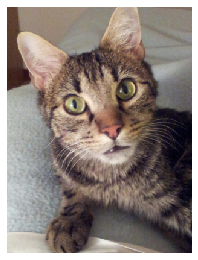

In [41]:
neko_url = "https://raw.githubusercontent.com/miguelgfierro/sciblog_support/master/Intro_to_Machine_Learning_API/neko.jpg"
neko = read_image_url(neko_url)
neko = resize_image(neko, neko.shape[0]//4, neko.shape[1]//4)
print(neko.shape)
plot_image(neko)

In [42]:
seq = iaa.Sequential([
    # Horizontal flips
    iaa.Fliplr(0.5), 
    
    # Random crops
    iaa.Crop(percent=(0, 0.3)), 
    
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-25, 25),
        shear=(-8, 8)
    ),
    
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    iaa.Multiply((0.8, 1.2), per_channel=0.2),
],
random_order=True # apply augmenters in random order
)

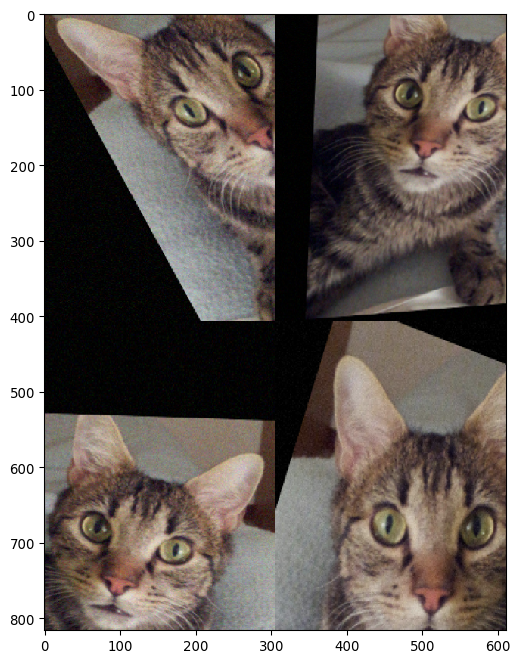

In [43]:
# Apply the transformations randomly and show them on a grid of rows x cols
seq.show_grid([neko], rows=2, cols=2)

## Text

Details on how to use EDA can be found in their [web](https://github.com/jasonwei20/eda_nlp).

In [ ]:
nltk.download("wordnet")

In [7]:
sentences = ["0\tIn the beginning the Universe was created. This has made a lot of people very angry and been widely regarded as a bad move.",
            "1\tFor instance, on the planet Earth, man had always assumed that he was more intelligent than dolphins because he had achieved so much: the wheel, New York, wars and so on, whilst all the dolphins had ever done was muck about in the water having a good time. But conversely, the dolphins had always believed that they were far more intelligent than man, for precisely the same reasons."]
filename = "input.txt"
output = "output.txt"

In [27]:
with open(filename, "w") as f:
    f.write("\n".join(sentences))

show_file(filename)

0	In the beginning the Universe was created. This has made a lot of people very angry and been widely regarded as a bad move.
1	For instance, on the planet Earth, man had always assumed that he was more intelligent than dolphins because he had achieved so much: the wheel, New York, wars and so on, whilst all the dolphins had ever done was muck about in the water having a good time. But conversely, the dolphins had always believed that they were far more intelligent than man, for precisely the same reasons.


In [28]:
%run augment.py --input=$filename --output=$output --num_aug=2 --alpha=0.2
show_file(output)

0	in beginning the universe was created this has made a lot of and been regarded as a bad move
0	in the beginning the universe was been this lot made has a of people very angry regarded created widely and as a bad move
1	for case on the major planet earth man had eer acquire that he was more intelligent than dolphinfish because he had achieved so practically the wheel novel york wars and so on whilst all the dolphinfish had ever coiffure was muck up about in the water having a dear metre but conversely the dolphinfish had eer believe that they were far more intelligent than man for on the button the same reasons
1	for instance on the planet earth man had forever always indiana assumed that he was more intelligent than dolphins because he had achieved so much the wheel new york wars and so steering wheel on sir thomas more whilst all the dolphins had ever young case done was muck about in the water having a good time but conversely gunk simulate the dolphins had always believed live tha

## Time series

Details on how to do data augmentation on time series can be found [here](https://github.com/terryum/Data-Augmentation-For-Wearable-Sensor-Data).


In [10]:
x = np.load(os.path.join("data", "X_sample.npy"))
print(x.shape)  ## 3600 samples (Time) * 3 features (X,Y,Z)

(3600, 3)


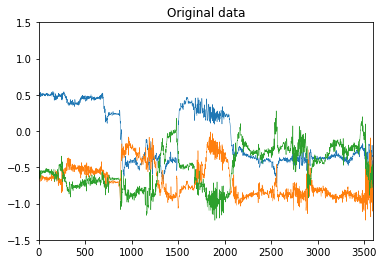

In [11]:
plot_series(x, "Original data")

#### Jittering
Hyperparameters:  
* sigma = standard devitation (STD) of the noise

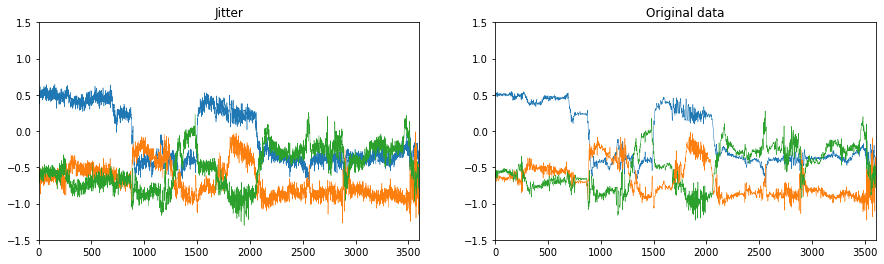

In [12]:
x_jitter = DA_Jitter(x, sigma=0.05)
plot_series(x_jitter, "Jitter", x, "Original data")

#### Scaling
Hyperparameters: 

* sigma = STD of the zoom-in/out factor

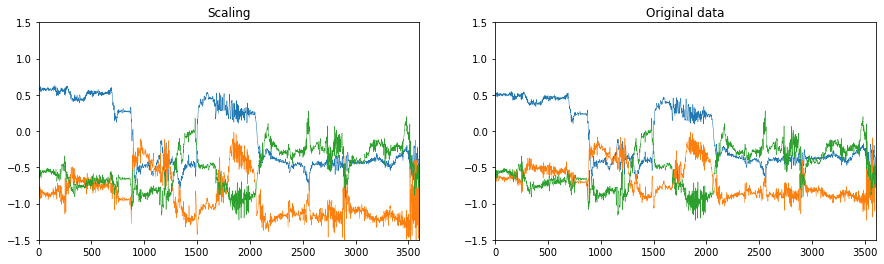

In [13]:
x_scaling = DA_Scaling(x, sigma=0.3)
plot_series(x_scaling, "Scaling", x, "Original data")

#### Magnitude Warping
Hyperparameters: 

* sigma = STD of the random knots for generating curves
* knot = # of knots for the random curves (complexity of the curves)

"Magnitude Warping" can be considered as "applying smoothly-varing noise to the entire samples"

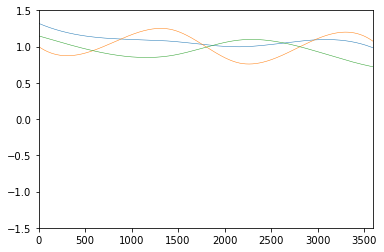

In [14]:
curves = GenerateRandomCurves(x, sigma=0.2, knot=4)
plot_series(curves)

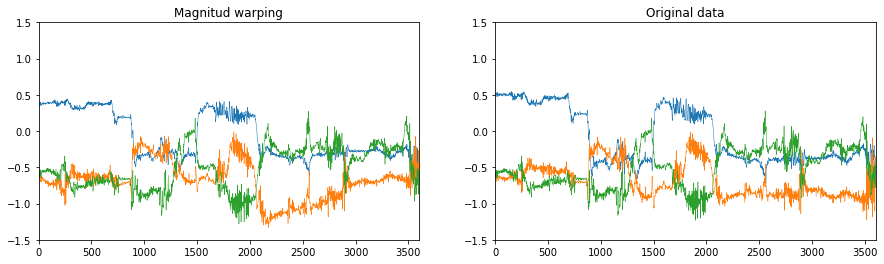

In [15]:
x_magwarp = DA_MagWarp(x, sigma=0.2, knot=4)
plot_series(x_magwarp, "Magnitud warping", x, "Original data")

#### Time Warping
Hyperparameters: 

* sigma = STD of the random knots for generating curves
* knot = # of knots for the random curves (complexity of the curves)


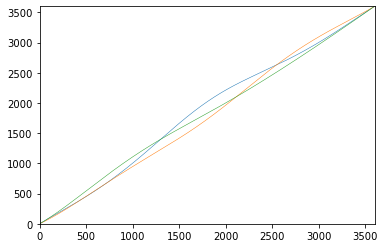

In [16]:
timesteps = DistortTimesteps(x, sigma=0.2, knot=4)
plot_series(timesteps, axis=[0, 3600, 0, 3600])

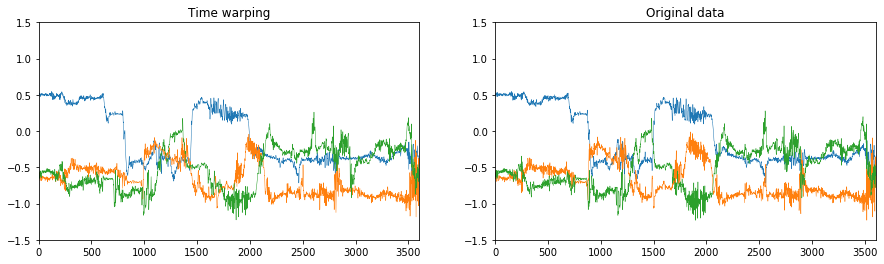

In [17]:
x_time_warp = DA_TimeWarp(x, sigma=0.2, knot=4)
plot_series(x_time_warp, "Time warping", x, "Original data")

#### Rotation


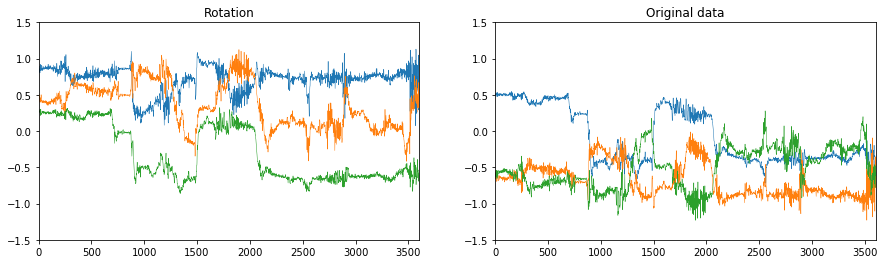

In [18]:
x_rotation = DA_Rotation(x)
plot_series(x_rotation, "Rotation", x, "Original data")

#### Permutation
Hyperparameters: 

* nPerm = # of segments to permute
* minSegLength = allowable minimum length for each segment

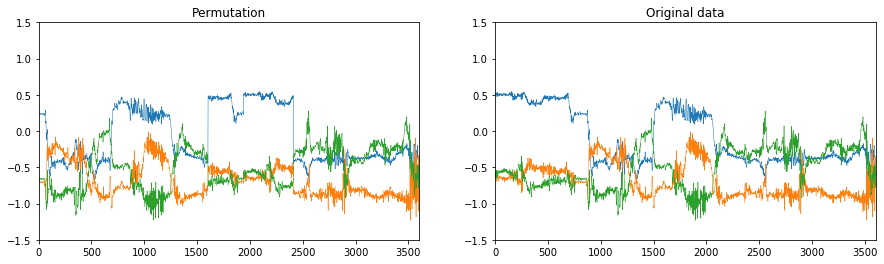

In [19]:
x_permutation = DA_Permutation(x, nPerm=4, minSegLength=100)
plot_series(x_permutation, "Permutation", x, "Original data")

#### Random Sampling
Hyperparameters: 

* nSample = # of subsamples (nSample <= X.shape[0])

This approach is similar to TimeWarp, but will use only subsamples (not all samples) for interpolation. (Using TimeWarp is more recommended)


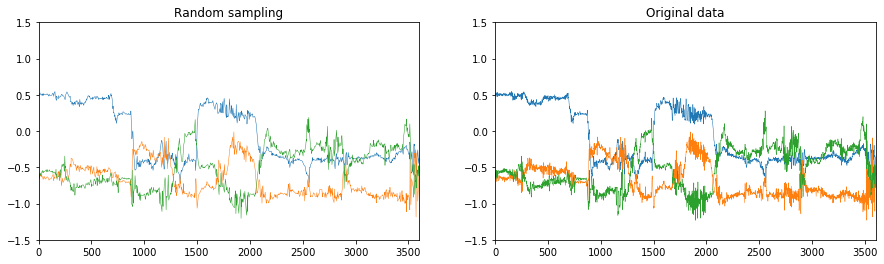

In [20]:
x_random_sampling = DA_RandSampling(x, nSample=1000)
plot_series(x_random_sampling, "Random sampling", x, "Original data")

## References

1. Jason W. Wei, Kai Zou. "EDA: Easy Data Augmentation Techniques for Boosting Performance on Text Classification Tasks". *ICLR 2019*. https://arxiv.org/abs/1901.11196

1. Terry Taewoong Um, Franz Michael Josef Pfister, Daniel Pichler, Satoshi Endo, Muriel Lang, Sandra Hirche, Urban Fietzek, Dana Kulić. "Data augmentation of wearable sensor data for parkinson’s disease monitoring using convolutional neural networks". In *Proceedings of the 19th ACM International Conference on Multimodal Interaction, ser. ICMI 2017*. New York, USA, 2017, pp. 216–220. https://arxiv.org/abs/1706.00527

1. Krizhevsky, Alex, Ilya Sutskever, and Geoffrey E. Hinton. "Imagenet classification with deep convolutional neural networks." In *Advances in neural information processing systems*, pp. 1097-1105. 2012. [Link to paper](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)

1. Mahajan, Dhruv, Ross Girshick, Vignesh Ramanathan, Kaiming He, Manohar Paluri, Yixuan Li, Ashwin Bharambe, and Laurens van der Maaten. "Exploring the limits of weakly supervised pretraining." In *Proceedings of the European Conference on Computer Vision (ECCV)*, pp. 181-196. 2018. https://arxiv.org/abs/1805.00932

1. Touvron, Hugo, Andrea Vedaldi, Matthijs Douze, and Hervé Jégou. "Fixing the train-test resolution discrepancy." arXiv preprint arXiv:1906.06423 (2019). https://arxiv.org/abs/1906.06423v2